# ___

# [ Machine Learning in Geosciences ]

**Department of Applied Geoinformatics and Carthography, Charles University** 

*Lukas Brodsky lukas.brodsky@natur.cuni.cz*

    
___

# Single Layer Neural Network 

The purpose of this notebook is to  demonstrate a single layer non-linear neural network. 

In [1]:
import torch
import torch.nn as nn  
import matplotlib.pyplot as plt

In [2]:
# synthetic the data (multi-step function / non-linear) 
X = torch.arange(-30, 30, 1).view(-1, 1).type(torch.FloatTensor)
X.shape

torch.Size([60, 1])

In [3]:
Y = torch.zeros(X.shape[0])
Y[(X[:, 0] <= -10)] = 1.0
Y[(X[:, 0] > -10) & (X[:, 0] < 10)] = 0.5
Y[(X[:, 0] > 10)] = 0

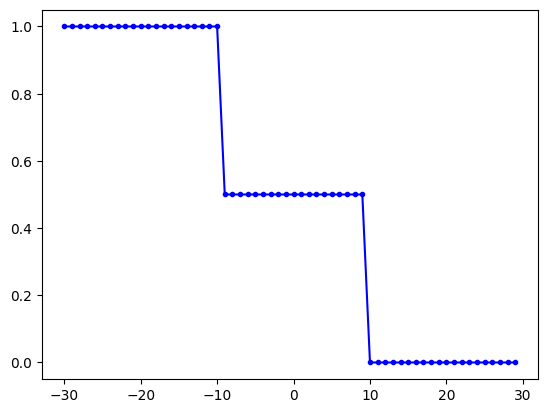

In [4]:
plt.plot(X, Y, 'b.-')

In [5]:
# define the model 
class One_layer_net(torch.nn.Module):    
    def __init__(self, input_size, hidden_neurons, output_size):
        super(One_layer_net, self).__init__()        
        # hidden layer 
        self.linear1 = torch.nn.Linear(input_size, hidden_neurons)
        # output layer 
        self.linear2 = torch.nn.Linear(hidden_neurons, output_size) 
        # defining layers as attributes
        self.layer_in = None
        self.hidden = None
        self.layer_out = None

    def forward(self, x):
        self.layer_in = torch.sigmoid(self.linear1(x))
        self.hidden = self.linear2(self.layer_in)
        self.layer_out = torch.sigmoid(self.hidden)

        return self.layer_out
    

In [6]:
# instantiate the model 
model = One_layer_net(1, 2, 1)  # 2 represents two neurons in one hidden layer

### Train the model

In [7]:
# loss function
# def criterion(y_pred, y):
#     # cross entropy loss  
#     out = -1 * torch.mean(y * torch.log(y_pred) + (1 - y) * torch.log(1 - y_pred))
#     return out

criterion = nn.MSELoss()

In [8]:
# optimization procedure: stochastic gradient descent 
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

c:\Users\uzivatel\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\uzivatel\AppData\Local\Programs\Python\Python311\Lib\site-packages\torch\autograd\__init__.py:266: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 9020). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ..\c10\cuda\CUDAFunctions.cpp:108.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pa

500 epochs done!


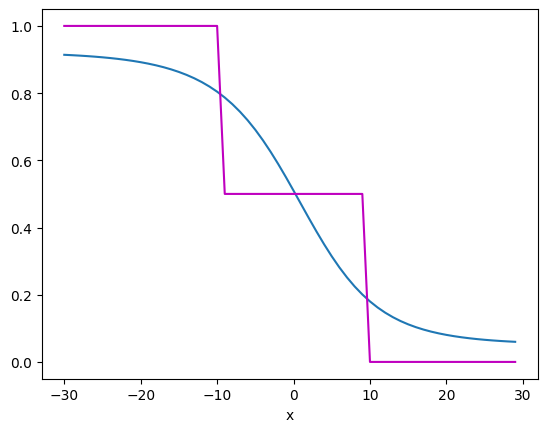

1000 epochs done!


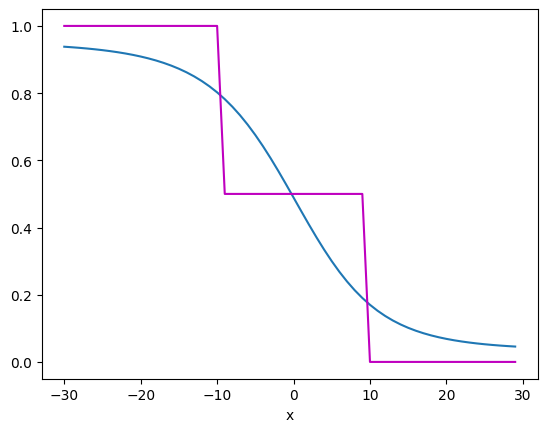

1500 epochs done!


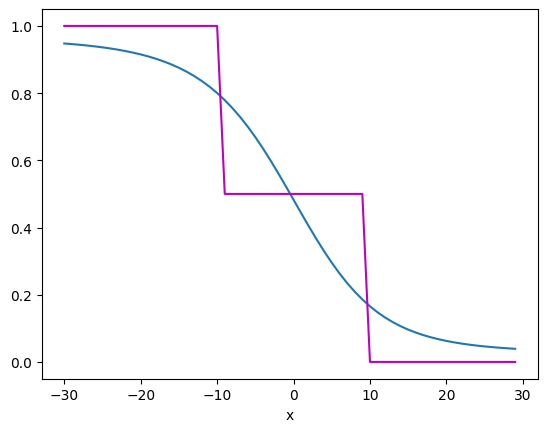

2000 epochs done!


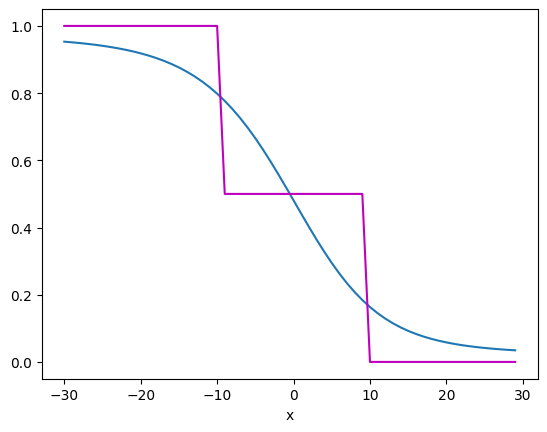

In [9]:
# Define the training loop
epochs = 2000
cost = []
total = 0

for epoch in range(epochs):
    total=0
    epoch = epoch + 1
    
    for x, y in zip(X, Y):
        yhat = model(x)
        loss = criterion(yhat, y)
        loss.backward() 
        optimizer.step()
        optimizer.zero_grad()
        # get total loss 
        total+=loss.item() 
    cost.append(total)
    
    if epoch % 500 == 0:
        print(str(epoch)+ " " + "epochs done!") 
        # plot the result of function approximator
        plt.plot(X.numpy(), model(X).detach().numpy())
        plt.plot(X.numpy(), Y.numpy(), 'm')
        plt.xlabel('x')
        plt.show()

Text(0.5, 1.0, 'loss')

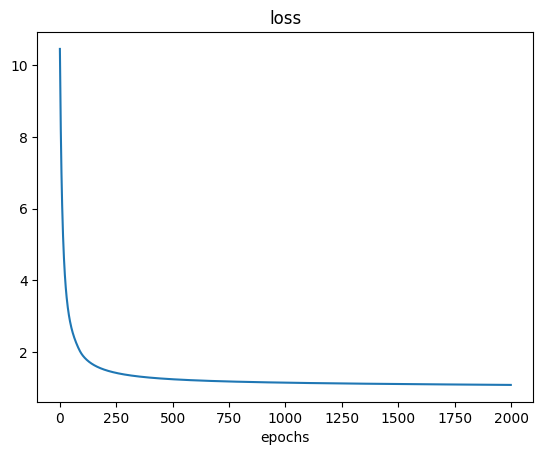

In [10]:
# plot the cost
plt.plot(cost)
plt.xlabel('epochs')
plt.title('loss')